# Project 1- ML Project - Bank Marketing Prediction

### Auther: Kamini Bagul

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


In [2]:
df=pd.read_csv("bank-marketing.csv")

In [3]:
df.shape

(45211, 19)

In [4]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.dtypes

age           int64
job          object
salary        int64
marital      object
education    object
targeted     object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [7]:
#check nulls
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

### Dataset does not contain any missing value.

## Tasks to perform- Read in the file and get basic information about the data, including numerical summaries.

### Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [9]:
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

#### If we purely look at numerical summary ie mean and standard deviation, we can't see that lot of values is -1. We can see that 75% values of pdays are -1. So -1 has special meaning over here ie previous campaign was made to them or not. So in our case if we want to make decision on customer who did have campaign previously, then we must exclude all the cases of -1. So, by doing this we can get to customer who had previously campaign.

### Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

pdays uses -1 as indicator and not value. Hence treat these value as missing

    Ignore these values in our average/median/state calculations.
    Keep it NaN
    Wherever pdays is -1, replace with NaN

In [11]:
# Since for relevant pdays, need to drop -1
df1 = df[df['pdays'] != -1]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8257 entries, 24060 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8257 non-null   int64 
 1   job        8257 non-null   object
 2   salary     8257 non-null   int64 
 3   marital    8257 non-null   object
 4   education  8257 non-null   object
 5   targeted   8257 non-null   object
 6   default    8257 non-null   object
 7   balance    8257 non-null   int64 
 8   housing    8257 non-null   object
 9   loan       8257 non-null   object
 10  contact    8257 non-null   object
 11  day        8257 non-null   int64 
 12  month      8257 non-null   object
 13  duration   8257 non-null   int64 
 14  campaign   8257 non-null   int64 
 15  pdays      8257 non-null   int64 
 16  previous   8257 non-null   int64 
 17  poutcome   8257 non-null   object
 18  response   8257 non-null   object
dtypes: int64(8), object(11)
memory usage: 1.3+ MB


In [12]:
print('Mean is',df1['pdays'].mean())
print('Median is',df1['pdays'].median())
print('Mode is',df1['pdays'].mode()[0])

Mean is 224.57769165556496
Median is 194.0
Mode is 182


#### This time mean and median has changed significantly because we have removed the case where pdays value is -1 ie we have removed the customer that were not contacted previously for campaign.

### Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

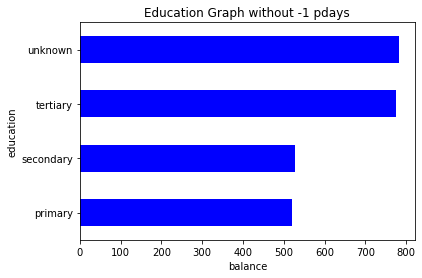

Unknown has highest median 782.0


In [13]:
plt.title('Education Graph without -1 pdays')
plt.xlabel('balance')
df2 = df1.groupby(['education']).median()['balance']
df2.plot(kind='barh',color='b')
plt.show()

print('Unknown has highest median',df2.max())

#### Thus, we can conclude from graph that customer with unkown level of education has highest median value for balance.

### Make a box plot for pdays. Do you see any outliers?


Boxplot without -1 pdays


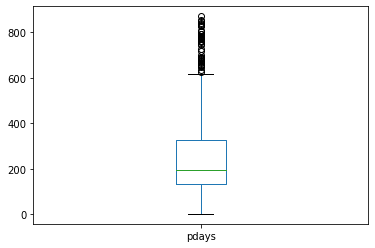

In [14]:
print('Boxplot without -1 pdays')
df1.pdays.plot.box()
plt.show()

#### Yes, from the above box plot we can see that there are outliers present in pdays.

### Handling the Outliers

In [15]:
df1['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [16]:
q1, q2, q3 = np.quantile(df1['pdays'], 0.25), np.quantile(df1['pdays'], 0.50), np.quantile(df1['pdays'], 0.75)
IQR = q3 - q1
uw, lw = q3 + (1.5 * IQR), q1 - (1.5 * IQR)

In [17]:
print(q1, q2, q3)
print(IQR)

133.0 194.0 327.0
194.0


In [18]:
df1['pdays'] = np.where(df1['pdays'] > uw, uw, df1['pdays'])
df1['pdays'] = np.where(df1['pdays'] < lw, lw, df1['pdays'])

Boxplot without -1 pdays without outliers


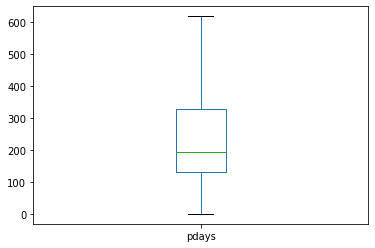

In [19]:
print('Boxplot without -1 pdays without outliers')
df1.pdays.plot.box()
plt.show()

###  The final goal is to make a predictive model to predict if the customer will respond positively to the campaign or not. The target variable is “response”

### First, perform bi-variate analysis to identify the features that are directly associated with the target variable. 

### Bi-Variate Analysis | EDA

### Convert the response variable to a convenient form

In [20]:
df1['response'] = np.where(df1['response']=='no',0,1)

In [21]:
df1.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151.0,3,failure,0
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166.0,1,other,1
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91.0,4,failure,1
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86.0,4,other,0
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143.0,3,failure,1


In [22]:
df1.response.value_counts()

0    6352
1    1905
Name: response, dtype: int64

### Make suitable plots for associations with numerical features and categorical features’

In [23]:
# Identifying categorical and numerical columns
cols = df1.columns.to_list()
num_cols= df1._get_numeric_data().columns.to_list()
cat_cols = list(set(cols) - set(num_cols))

print('Numerical Columns')
print(num_cols)
print('\nCategorical Columns')
print(cat_cols)

Numerical Columns
['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'response']

Categorical Columns
['education', 'month', 'housing', 'contact', 'job', 'loan', 'targeted', 'poutcome', 'marital', 'default']


Visualizing Numerical Features with Response

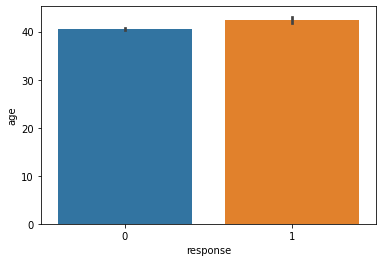

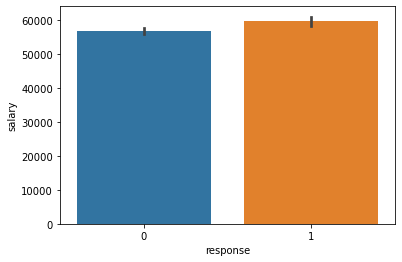

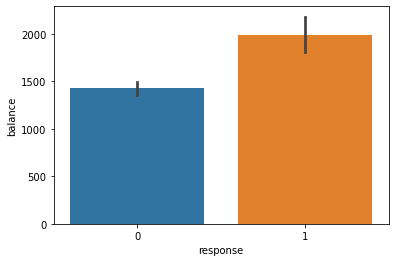

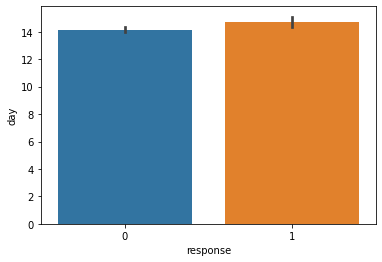

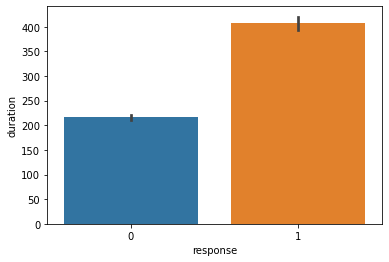

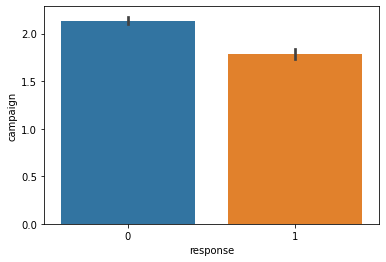

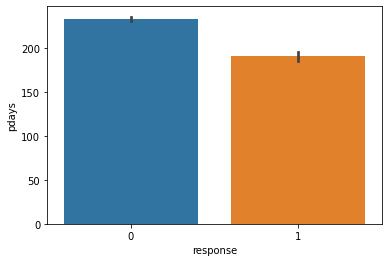

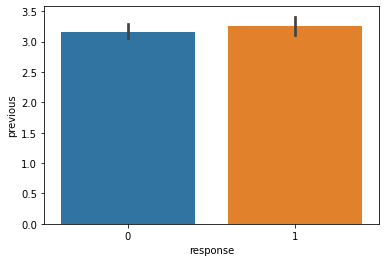

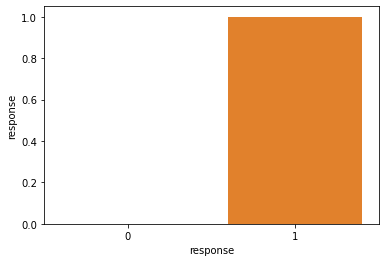

In [24]:
for i in df1[num_cols]:
    sns.barplot(df1['response'],df1[i])
    plt.show()

Visualizing Categorical Features with Response

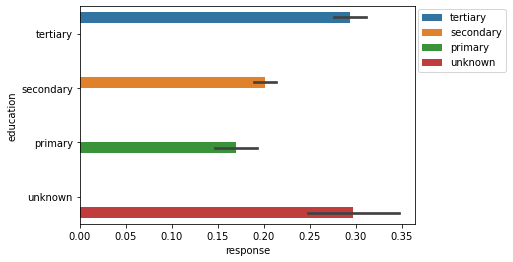

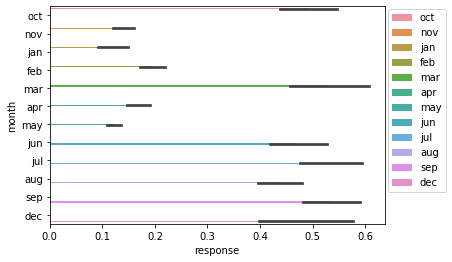

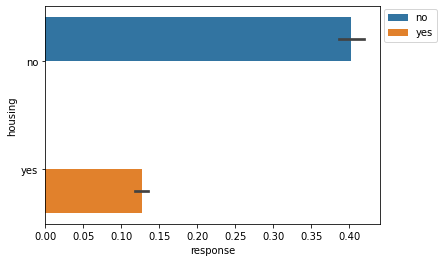

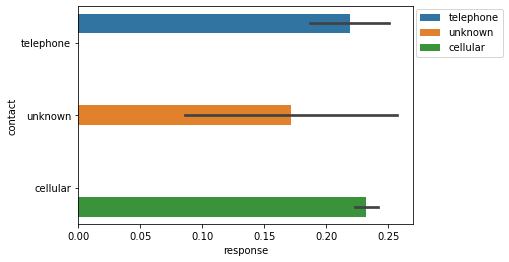

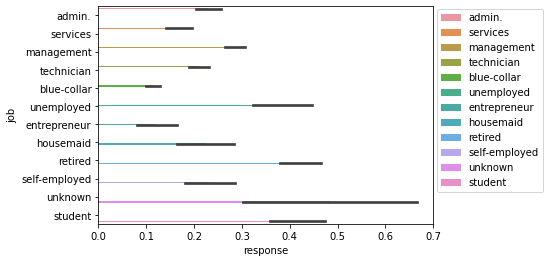

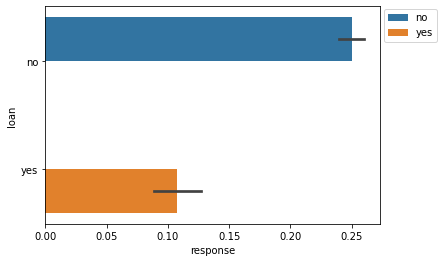

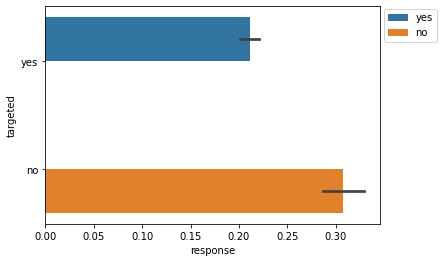

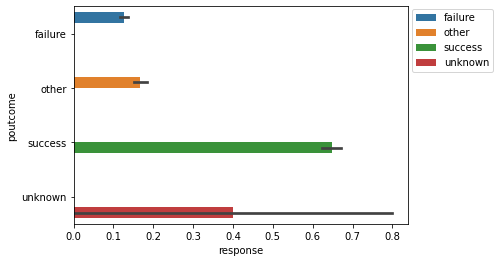

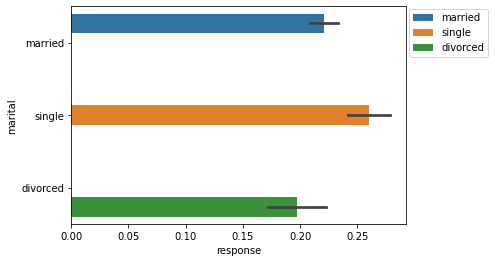

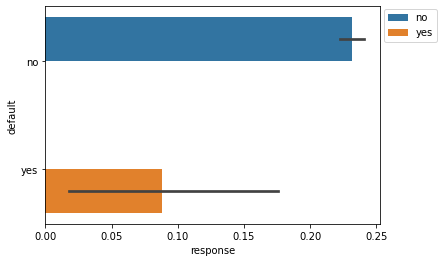

In [25]:
for i in df1[cat_cols]:
    sns.barplot(df1['response'],df1[i],hue=df1[i])
    plt.legend(bbox_to_anchor=(1.01,.99),borderaxespad=0,loc=2)
    plt.show()

    Are the features about the previous campaign data useful?
    Are pdays and poutcome associated with the target? 
    If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the 
    previous campaign data is missing? Explain your approach and your decisio

#### Yes previous campaign data is useful & pdays, poutcome is associated with the target variable 'response'

#### The -1 pdays or missing values or outliers are filtered out as we would not be using that in Modelling.

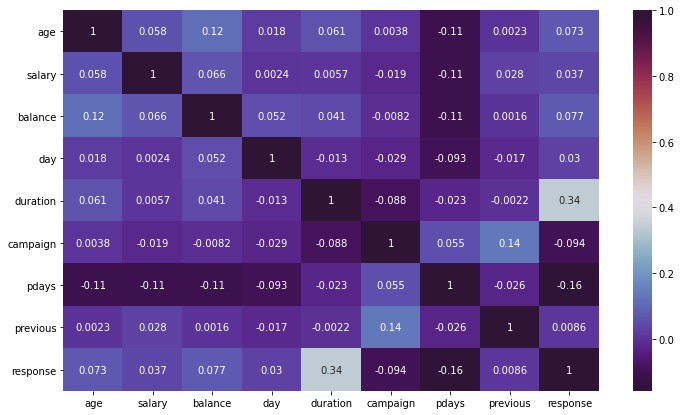

In [26]:
# Correlation Matrix on Resultant Data
plt.figure(figsize=(12,7))
corr = df1.corr()
sns.heatmap(corr,annot=True,cmap= 'twilight_shifted')
plt.show()

### Before the predictive modeling part, make sure to perform –
- The necessary transformations for the categorical variables and the numeric variables
- Handle variables corresponding to the previous campaign
- Train test split

#### The necessary transformations for the categorical variables and the numeric variables

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
df2 = df1[cat_cols].apply(LabelEncoder().fit_transform)

In [29]:
df2.head()

,education,month,housing,contact,job,loan,targeted,poutcome,marital,default
24060,2,10,0,1,0,0,1,0,1,0
24062,1,10,1,1,0,1,1,1,2,0
24064,1,10,1,1,7,0,1,0,1,0
24072,2,10,1,1,4,0,1,1,1,0
24077,2,10,1,1,4,0,1,0,1,0


In [30]:
df3 = df2.join(df1[num_cols])

In [31]:
df3.head()

,education,month,housing,contact,job,loan,targeted,poutcome,marital,default,age,salary,balance,day,duration,campaign,pdays,previous,response
24060,2,10,0,1,0,0,1,0,1,0,33,50000,882,21,39,1,151.0,3,0
24062,1,10,1,1,0,1,1,1,2,0,42,50000,-247,21,519,1,166.0,1,1
24064,1,10,1,1,7,0,1,0,1,0,33,70000,3444,21,144,1,91.0,4,1
24072,2,10,1,1,4,0,1,1,1,0,36,100000,2415,22,73,1,86.0,4,0
24077,2,10,1,1,4,0,1,0,1,0,36,100000,0,23,140,1,143.0,3,1


#### The necessary transformations for the categorical variables and the numeric variables are done

In [32]:
df3.corr()

,education,month,housing,contact,job,loan,targeted,poutcome,marital,default,age,salary,balance,day,duration,campaign,pdays,previous,response
education,1.000000,-0.010829,-0.129804,-0.048456,0.159280,-0.047718,-0.632513,0.082852,0.121688,-0.013682,-0.119516,0.423157,0.074166,0.023542,-0.001142,-0.024343,-0.145300,0.000115,0.108098
month,-0.010829,1.000000,0.014452,0.047045,-0.002498,0.000524,0.010187,-0.019188,-0.024130,0.020123,0.013909,0.019820,0.015723,-0.024264,-0.036446,0.023224,0.018843,0.013977,-0.009586
housing,-0.129804,0.014452,1.000000,-0.069869,-0.132378,0.109815,0.087470,-0.284439,-0.056963,0.022644,-0.179386,-0.035905,-0.109163,-0.066740,-0.072070,0.063071,0.345404,0.008934,-0.317501
contact,-0.048456,0.047045,-0.069869,1.000000,-0.006279,-0.020904,0.020464,0.024590,-0.031866,-0.019834,0.166384,-0.035805,0.030317,-0.012330,-0.036360,0.063199,0.063660,0.043830,-0.014321
job,0.159280,-0.002498,-0.132378,-0.006279,1.000000,-0.033500,-0.091197,0.066642,0.072746,-0.021012,-0.020606,0.115271,0.041975,0.013841,0.024449,-0.008764,-0.113023,-0.000266,0.081239
loan,-0.047718,0.000524,0.109815,-0.020904,-0.033500,1.000000,0.070420,-0.103154,-0.055435,0.052261,-0.008330,0.013788,-0.085004,0.007550,-0.033874,0.007444,0.022999,0.016549,-0.115805
targeted,-0.632513,0.010187,0.087470,0.020464,-0.091197,0.070420,1.000000,-0.071356,-0.255247,0.019593,0.140750,-0.228338,-0.052007,-0.026179,-0.014729,0.017948,0.079068,-0.001205,-0.091216
poutcome,0.082852,-0.019188,-0.284439,0.024590,0.066642,-0.103154,-0.071356,1.000000,0.045015,-0.025566,0.051987,0.013079,0.051464,0.017125,0.108473,-0.000502,-0.239923,0.041607,0.420519
marital,0.121688,-0.024130,-0.056963,-0.031866,0.072746,-0.055435,-0.255247,0.045015,1.000000,-0.005632,-0.414972,-0.042212,-0.019767,0.016797,-0.009075,-0.008338,-0.010550,0.004536,0.049234
default,-0.013682,0.020123,0.022644,-0.019834,-0.021012,0.052261,0.019593,-0.025566,-0.005632,1.000000,-0.027825,0.000361,-0.045010,-0.001013,-0.002635,-0.002064,0.035301,0.012149,-0.028299


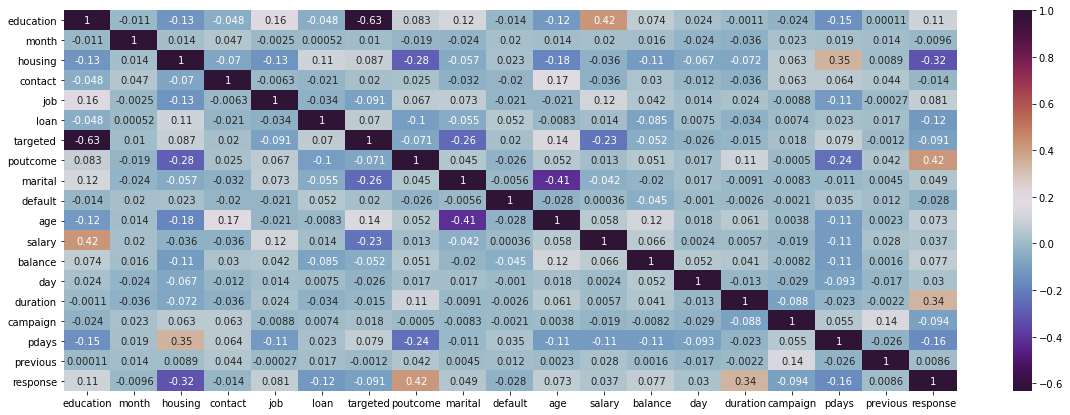

In [33]:
plt.figure(figsize=(20,7))
corr = df3.corr()
sns.heatmap(corr,annot=True,cmap= 'twilight_shifted')
plt.show()

### Train test split

In [34]:
## Generally X - Independent variable, y - Dependent variable


In [35]:
x = df3.drop("response", axis=1)
x.head()

,education,month,housing,contact,job,loan,targeted,poutcome,marital,default,age,salary,balance,day,duration,campaign,pdays,previous
24060,2,10,0,1,0,0,1,0,1,0,33,50000,882,21,39,1,151.0,3
24062,1,10,1,1,0,1,1,1,2,0,42,50000,-247,21,519,1,166.0,1
24064,1,10,1,1,7,0,1,0,1,0,33,70000,3444,21,144,1,91.0,4
24072,2,10,1,1,4,0,1,1,1,0,36,100000,2415,22,73,1,86.0,4
24077,2,10,1,1,4,0,1,0,1,0,36,100000,0,23,140,1,143.0,3


In [36]:
y= df3[['response']]
y.head()

,response
24060,0
24062,1
24064,1
24072,0
24077,1


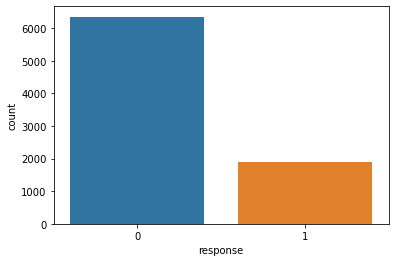

In [37]:
sns.countplot(x='response', data=df3)
plt.show()

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=1)

In [40]:
var =[x_train, x_test, y_train, y_test]
for i in var:
    print(i.head(2))
    print(i.shape)

       education  month  housing  contact  job  loan  targeted  poutcome  \
44701          0     11        0        1    5     0         1         1   
43668          2      8        0        0    6     0         1         0   

       marital  default  age  salary  balance  day  duration  campaign  pdays  \
44701        0        0   84   55000     1680    6       113         5   97.0   
43668        1        0   43   60000    10072   12        98         1   77.0   

       previous  
44701         3  
43668         5  
(6605, 18)
       education  month  housing  contact  job  loan  targeted  poutcome  \
35195          1      8        1        0    9     0         1         0   
35225          1      8        1        0    2     1         1         1   

       marital  default  age  salary  balance  day  duration  campaign  pdays  \
35195        1        0   35   60000      883    7       333         1  351.0   
35225        1        0   50  120000      806    7       141         8 

In [41]:
# Checking data split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6605, 18)
(6605, 1)
(1652, 18)
(1652, 1)


## Predictive model 1: Logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logreg=LogisticRegression()
model=logreg.fit(x_train, y_train)

In [43]:
y_pred=model.predict(x_test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1294
           1       0.56      0.20      0.29       358

    accuracy                           0.79      1652
   macro avg       0.68      0.58      0.58      1652
weighted avg       0.76      0.79      0.75      1652



In [46]:
# confusion matrix
cm =confusion_matrix(y_test,y_pred)
print(cm)

[[1238   56]
 [ 288   70]]


In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

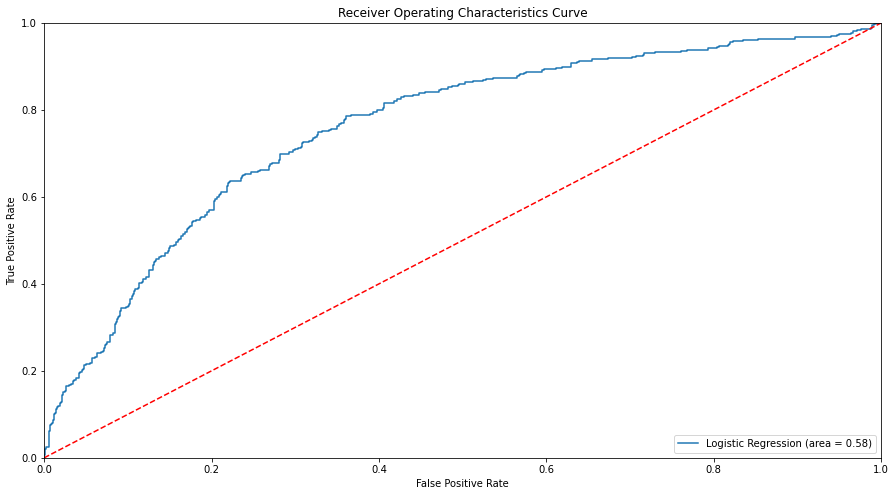

In [48]:
roc_score = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure(figsize = (15, 8))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = %0.2f)' % roc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc='lower right')
plt.show()

## Estimate the model performance using k fold cross validation

In [49]:
from sklearn.model_selection import cross_val_score
acurracy_LRG = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 5)

In [50]:
print('Accuracies from all CV', acurracy_LRG)

Accuracies from all CV [0.77971234 0.77138531 0.78122634 0.78274035 0.79182438]


In [51]:
print('Overall Accuracy of this Logistic Regresstion Model:', (acurracy_LRG.mean()*100))

Overall Accuracy of this Logistic Regresstion Model: 78.13777441332323


In [69]:
#Analyzing the coefficients
pd.concat([pd.DataFrame(x_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(model.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,education,0.000006
1,month,-0.002723
2,housing,-0.001126
3,contact,-0.000072
4,job,-0.000712
5,loan,-0.000338
6,targeted,-0.000645
7,poutcome,0.001878
8,marital,-0.000331
9,default,-0.000015


### Which features are the most important from your model?

In [75]:
# feature selection
from sklearn.feature_selection import RFE

rfe = RFE(model, 5)

rfe=rfe.fit(x_train,y_train)
#summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
x_train.columns[rfe.support_]


[ True False  True False False  True False  True False  True False False
 False False False False False False]
[ 1  6  1 12  8  1  3  1  4  1  5 14 13 11  7  2  9 10]


Index(['education', 'housing', 'loan', 'poutcome', 'default'], dtype='object')

## Predictive model 2: Random Forest

#### Use not more than 50 trees, and control the depth of the trees to prevent overfitting

In [53]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

R = RandomForestClassifier(max_depth=5, random_state=1,max_leaf_nodes=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
R.fit(x_train,y_train)



RandomForestClassifier(max_depth=5, max_leaf_nodes=50, random_state=1)

In [54]:
cv1_score= cross_val_score(R,x_train,y_train, cv=5)
np.mean(cv1_score)

0.8364875094625284

In [55]:
y_pred1 = R.predict(x_test)

In [56]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1294
           1       0.79      0.42      0.55       358

    accuracy                           0.85      1652
   macro avg       0.82      0.70      0.73      1652
weighted avg       0.84      0.85      0.83      1652



In [57]:
# confusion matrix
cm =confusion_matrix(y_test,y_pred1)
print(cm)

[[1253   41]
 [ 207  151]]


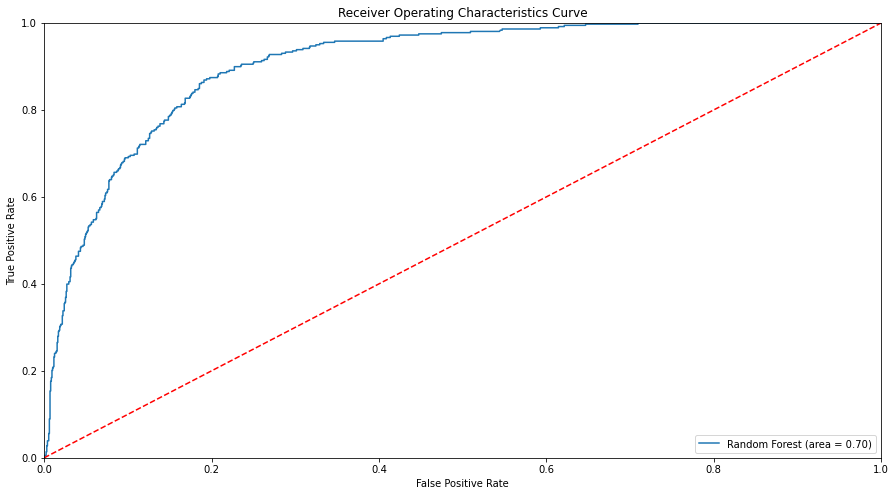

In [58]:
roc_score = roc_auc_score(y_test, R.predict(x_test), multi_class = "ovr")
fpr, tpr, thresholds = roc_curve(y_test, R.predict_proba(x_test)[:,1])
plt.figure(figsize = (15, 8))
plt.plot(fpr, tpr, label = 'Random Forest (area = %0.2f)' % roc_score)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc='lower right')
plt.show()



In [59]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test, y_pred1))
print(metrics.mean_squared_error(y_test, y_pred1))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

0.15012106537530268
0.15012106537530268
0.38745459782444536


### Estimate the model performance using k fold cross validation

In [60]:
from sklearn.model_selection import cross_val_score
acurracy_RFM= cross_val_score(estimator = R, X = x_train, y = y_train, cv = 5)

In [61]:
print('Accuracies from all CV', acurracy_RFM)

Accuracies from all CV [0.83800151 0.83800151 0.84254353 0.8327025  0.83118849]


In [62]:
print('Overall Accuracy of thisRandom Forest model Model :', (acurracy_RFM.mean()*100))

Overall Accuracy of thisRandom Forest model Model : 83.64875094625283


### Which features are the most important from your model?

In [63]:
# feature selection
from sklearn.feature_selection import RFE

rfe1 = RFE(R, 5)

rfe1=rfe1.fit(x_train,y_train)
#summarize the selection of the attributes
print(rfe1.support_)
print(rfe1.ranking_)
x_train.columns[rfe1.support_]

[False  True  True False False False False  True False False False False
 False False  True False  True False]
[10  1  1 11  6  7 13  1 12 14  2  5  4  3  1  9  1  8]


Index(['month', 'housing', 'poutcome', 'duration', 'pdays'], dtype='object')

### 'month', 'housing', 'poutcome', 'duration', 'pd are imp feature from RANDOM FOREST perspective.

## Compare the performance of the Random Forest and the logistic model –

- Evaluate both models on the test set
- Which metric did you choose and why?
- Which model has better performance on the test set? 
- Compare the feature importance from the different models – do they agree? Are the top features similar in both models?

## Compare the feature importance from the different models – do they agree? Are the top features similar in both models?

In [64]:
print("Features in logistic Regesstion model" , x_train.columns[rfe.support_])

Features in logistic Regesstion model Index(['education', 'housing', 'loan', 'poutcome', 'default'], dtype='object')


In [76]:
print("Features in Random forest model", x_train.columns[rfe1.support_])

Features in Random forest model Index(['month', 'housing', 'poutcome', 'duration', 'pdays'], dtype='object')


#### the features are different in both models

## Which model has better performance on the test set?

In [77]:
print('Overall Accuracy of this Logistic Regresstion Model:', (acurracy_LRG.mean()*100))

Overall Accuracy of this Logistic Regresstion Model: 78.13777441332323


In [78]:
print('Overall Accuracy of this Random Forest model Model :', (acurracy_RFM.mean()*100))

Overall Accuracy of this Random Forest model Model : 83.64875094625283


### Random Forest Performs much better as its average accuracy score is 83.64% to that of Logistic regression which has an accuracy of 78.13%.

#### I have used Accuracy as a metric to compare because I have handled the imbalanced data, would it be imbalanced I should have used F1-score.